In [3]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

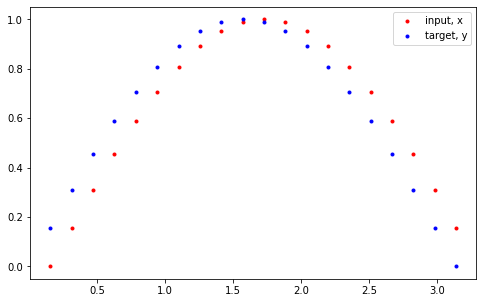

In [4]:
plt.figure(figsize=(8,5))

# how many time steps/data pts are in one batch of data
seq_length = 20

# generate evenly spaced data pts
time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
data.resize((seq_length + 1, 1)) # size becomes (seq_length+1, 1), adds an input_size dimension

x = data[:-1] # all but the last piece of data
y = data[1:] # all but the first

# display the data
plt.plot(time_steps[1:], x, 'r.', label='input, x') # x
plt.plot(time_steps[1:], y, 'b.', label='target, y') # y

plt.legend(loc='best')
plt.show()

In [5]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        
        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        
        # last, fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)
        
        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        # shape output to be (batch_size*seq_length, hidden_dim)
        r_out = r_out.view(-1, self.hidden_dim)  
        
        # get final output 
        output = self.fc(r_out)
        
        return output, hidden

In [6]:
# test that dimensions are as expected
test_rnn = RNN(input_size=1, output_size=1, hidden_dim=10, n_layers=2)

# generate evenly spaced, test data pts
time_steps = np.linspace(0, np.pi, seq_length)
data = np.sin(time_steps)
data.resize((seq_length, 1))

test_input = torch.Tensor(data).unsqueeze(0) # give it a batch_size of 1 as first dimension
print('Input size: ', test_input.size())

# test out rnn sizes
test_out, test_h = test_rnn(test_input, None)
print('Output size: ', test_out.size())
print('Hidden state size: ', test_h.size())

Input size:  torch.Size([1, 20, 1])
Output size:  torch.Size([20, 1])
Hidden state size:  torch.Size([2, 1, 10])


In [7]:
input_size=1 
output_size=1
hidden_dim=32
n_layers=1

# instantiate an RNN
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [8]:
# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01) 

In [10]:
# train the RNN
def train(rnn, n_steps, print_every):
    
    # initialize the hidden state
    hidden = None      
    
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data 
        time_steps = np.linspace(step * np.pi, (step+1)*np.pi, seq_length + 1)
        data = np.sin(time_steps)
        data.resize((seq_length + 1, 1)) # input_size=1

        x = data[:-1]
        y = data[1:]
        
        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero gradients
        optimizer.zero_grad()
        # perform backprop and update weights
        loss.backward()
        optimizer.step()

        # display loss and predictions
        if batch_i%print_every == 0:        
            print('Loss: ', loss.item())
            plt.plot(time_steps[1:], x, 'r.') # input
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.') # predictions
            plt.show()
    
    return rnn

Loss:  0.002906305715441704


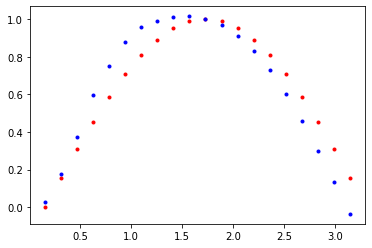

Loss:  0.0003751055628526956


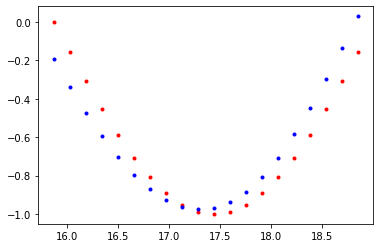

Loss:  0.00021747096616309136


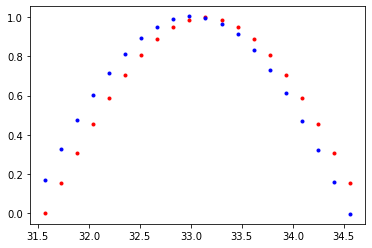

Loss:  0.00026113956118933856


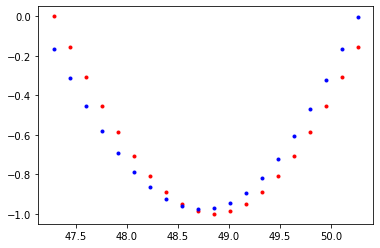

Loss:  0.00013189100718591362


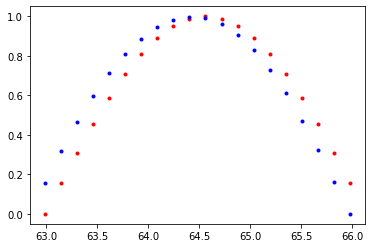

Loss:  0.00017943131388165057


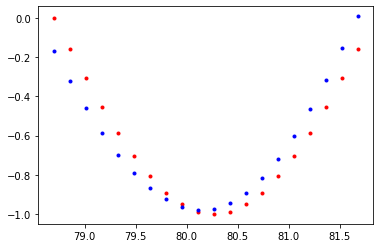

Loss:  0.0001319948787568137


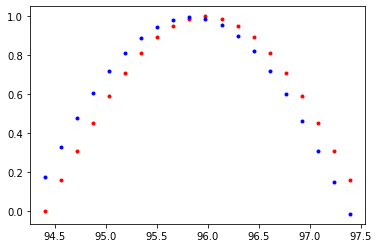

Loss:  0.0001599856186658144


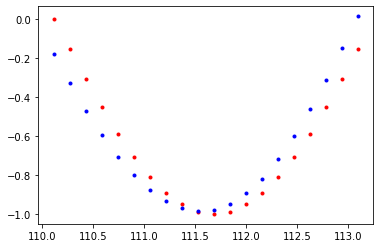

Loss:  0.0001205855660373345


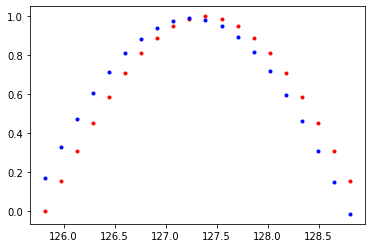

Loss:  0.00016216293442994356


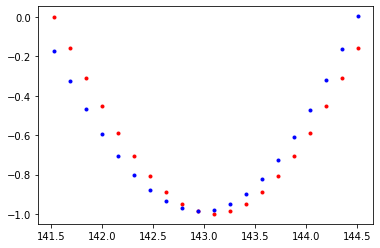

Loss:  0.00010351496894145384


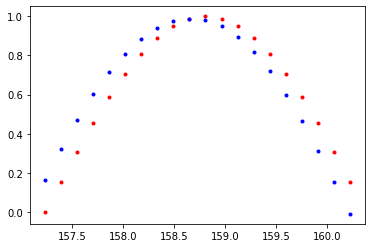

Loss:  0.0001656933454796672


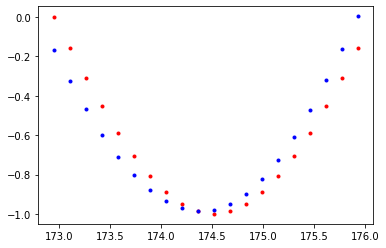

Loss:  0.00012586486991494894


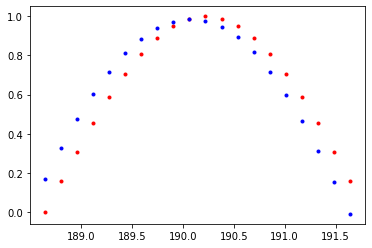

Loss:  0.00016634473286103457


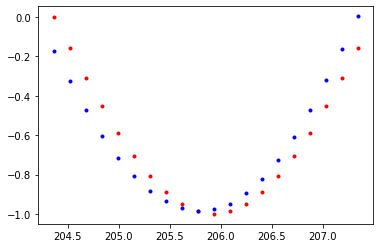

Loss:  0.000132707878947258


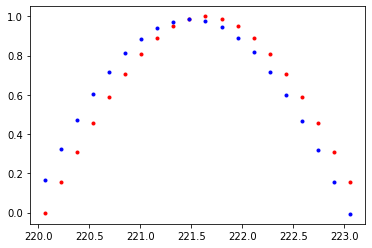

In [12]:
# train the rnn and monitor results
n_steps = 75
print_every = 5

trained_rnn = train(rnn, n_steps, print_every)

In [ ]:
# Задача
# 1. Сгенерируйте набор данных для предсказания временных последовательностей. Выполните тренировку RNN
# 2. Модифицируйте сеть, используя в качестве рекуррентного слоя LSTM слой библиотеки pytorch.
# https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

# 3. решите задачу набора данных лекции 7.

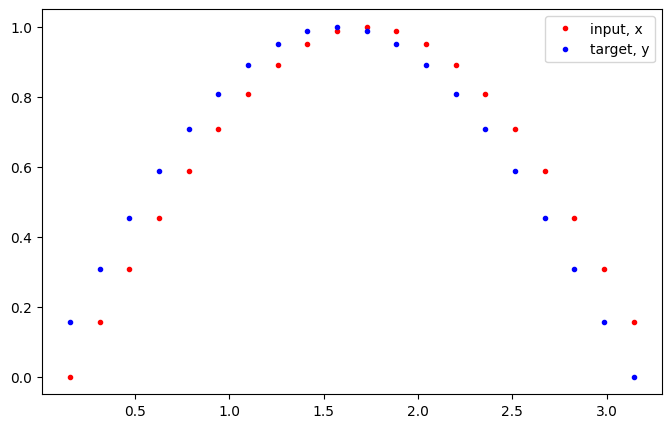

Loss:  0.6771484613418579


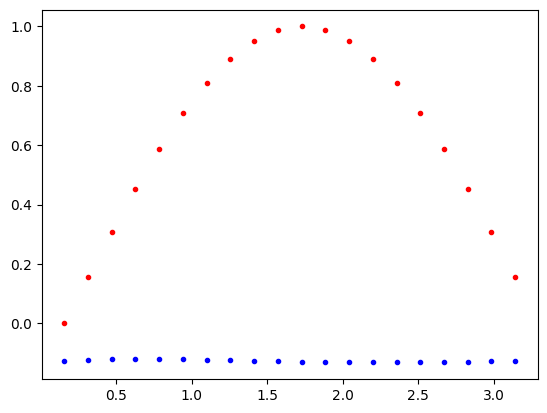

Loss:  0.3891669809818268


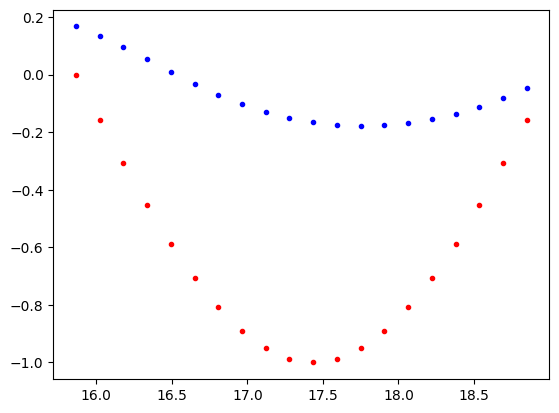

Loss:  0.11794056743383408


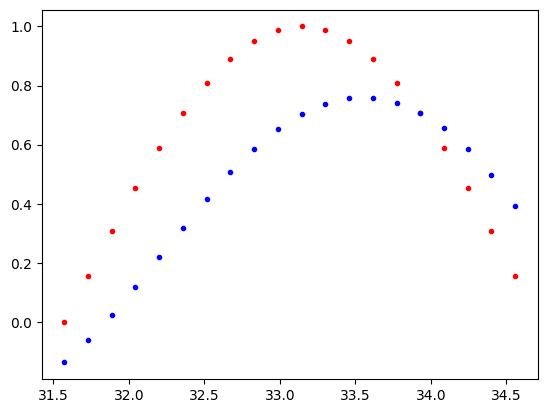

Loss:  0.04806488752365112


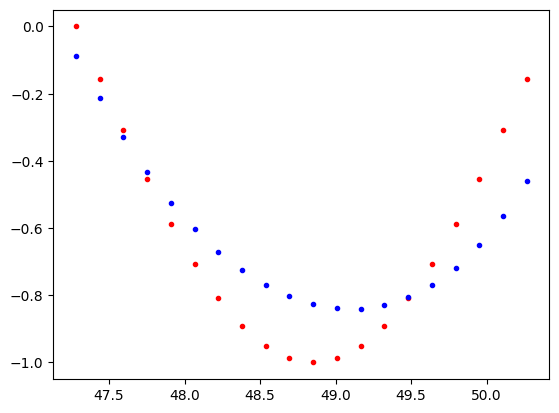

Loss:  0.016147172078490257


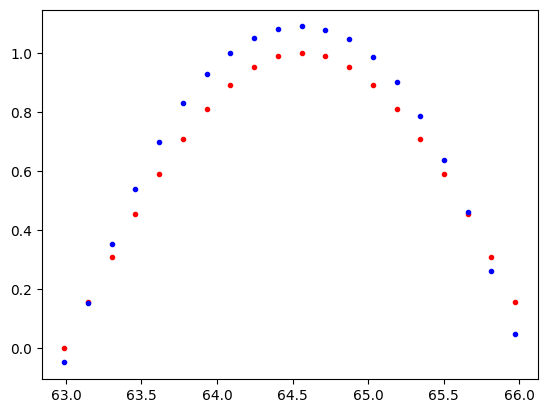

Loss:  0.013608735986053944


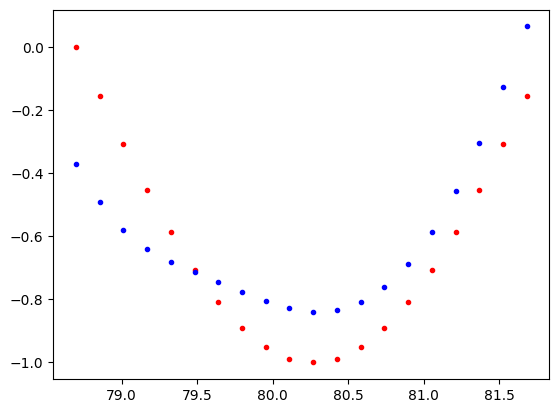

Loss:  0.006083382293581963


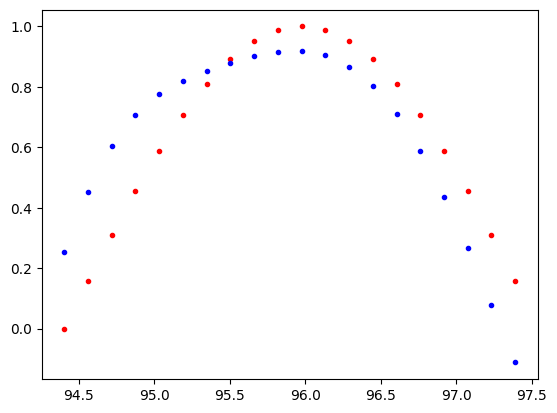

Loss:  0.0032691291999071836


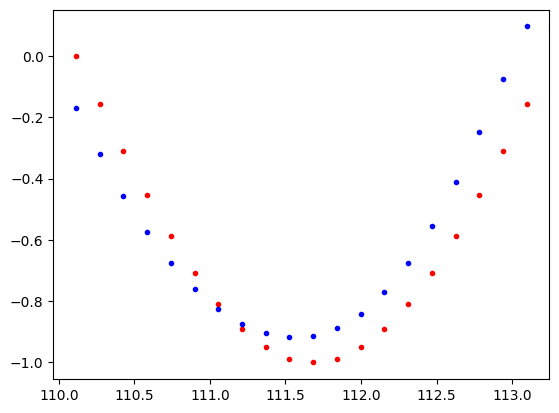

Loss:  0.004129673819988966


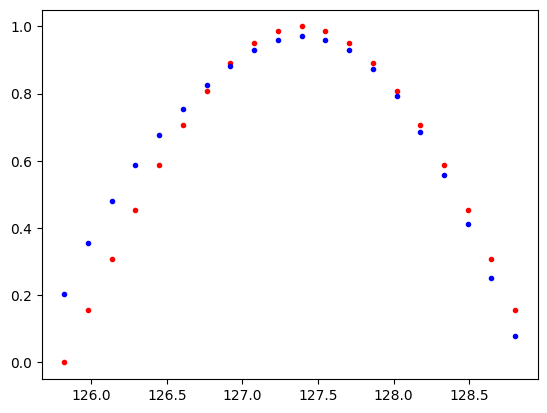

Loss:  0.0004883470246568322


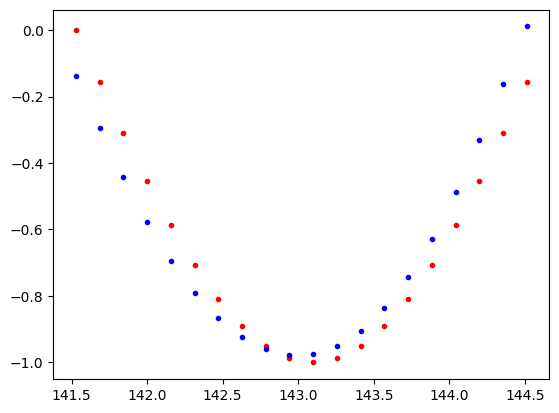

Loss:  0.002054959535598755


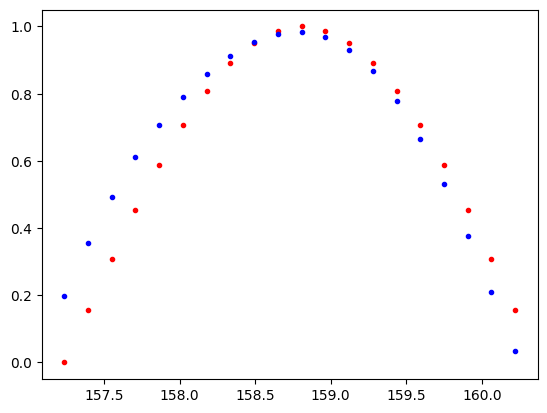

Loss:  0.0008241127361543477


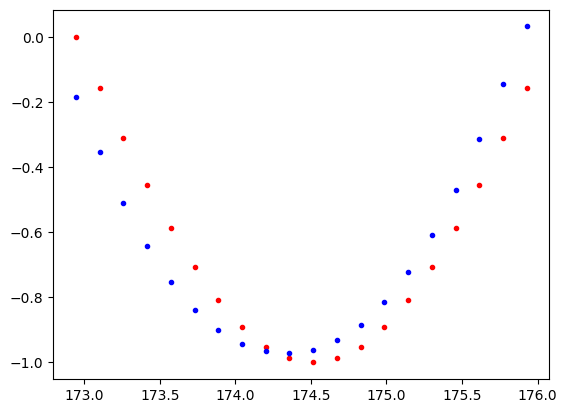

Loss:  0.0008315129089169204


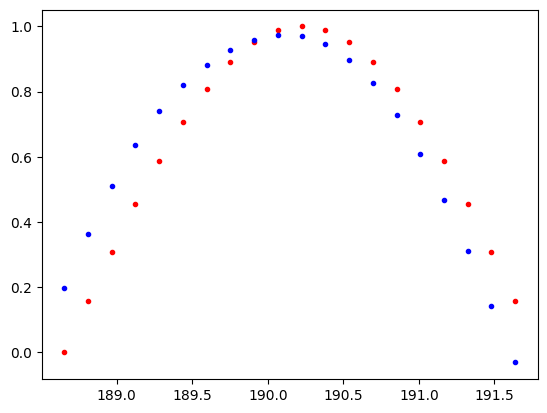

Loss:  0.000480930000776425


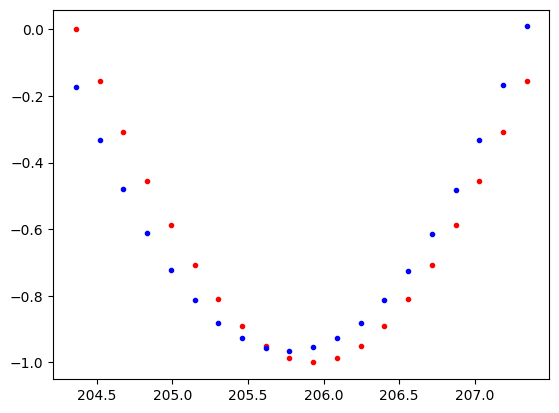

Loss:  0.0004419850301928818


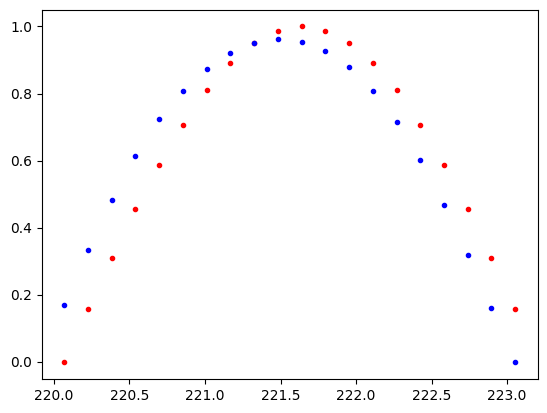

In [1]:
# 2. Модифицируйте сеть, используя в качестве рекуррентного слоя LSTM слой библиотеки pytorch.
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Генерация данных
plt.figure(figsize=(8, 5))
seq_length = 20  # длина временной последовательности
time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
data.resize((seq_length + 1, 1))  # добавляем измерение input_size

x = data[:-1]  # входные данные
y = data[1:]  # целевые значения

# Визуализация
plt.plot(time_steps[1:], x, 'r.', label='input, x')  # входные данные
plt.plot(time_steps[1:], y, 'b.', label='target, y')  # целевые значения
plt.legend(loc='best')
plt.show()

# Определение LSTM
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim

        # LSTM слой
        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True)
        # Полносвязный слой
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # LSTM возвращает выход и новое скрытое состояние
        r_out, hidden = self.lstm(x, hidden)
        # Изменяем форму выхода для полносвязного слоя
        r_out = r_out.view(-1, self.hidden_dim)
        # Предсказание через полносвязный слой
        output = self.fc(r_out)
        return output, hidden

# Создание модели
input_size = 1
output_size = 1
hidden_dim = 32
n_layers = 1
lstm = LSTM(input_size, output_size, hidden_dim, n_layers)

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=0.01)

# Функция обучения
def train_lstm(model, n_steps, print_every):
    hidden = None  # начальное скрытое состояние
    for batch_i, step in enumerate(range(n_steps)):
        # Генерация данных на каждом шаге
        time_steps = np.linspace(step * np.pi, (step + 1) * np.pi, seq_length + 1)
        data = np.sin(time_steps)
        data.resize((seq_length + 1, 1))
        x = data[:-1]
        y = data[1:]

        # Преобразование в тензоры
        x_tensor = torch.Tensor(x).unsqueeze(0)
        y_tensor = torch.Tensor(y)

        # Прогон через LSTM
        prediction, hidden = model(x_tensor, hidden)

        # Разрыв обратного распространения градиента
        hidden = tuple([h.data for h in hidden])

        # Вычисление ошибки
        loss = criterion(prediction, y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Вывод графиков и ошибки
        if batch_i % print_every == 0:
            print('Loss: ', loss.item())
            plt.plot(time_steps[1:], x, 'r.')  # входные данные
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.')  # предсказания
            plt.show()

    return model

# Обучение модели
n_steps = 75
print_every = 5
trained_lstm = train_lstm(lstm, n_steps, print_every)

In [2]:
# 3. решите задачу набора данных лекции 7.
# Задание (файл 2)
# Разделить данные на N групп. (возможно, выбрать первые M данных для обучения)
# Реализовать предсказание ARIMA для 2 (тренировочной группы) на основе 1. Рассчитать MSE.
# Исследовать качество работы модели в зависимости от параметров (для групп 1-2).
# (1)Выполнить итеративное предсказание, данные для каждого следующего предсказания обновлять по методу
# "экспоненциальное среднее".
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error


Ошибка MSE для модели ARIMA: 0.271


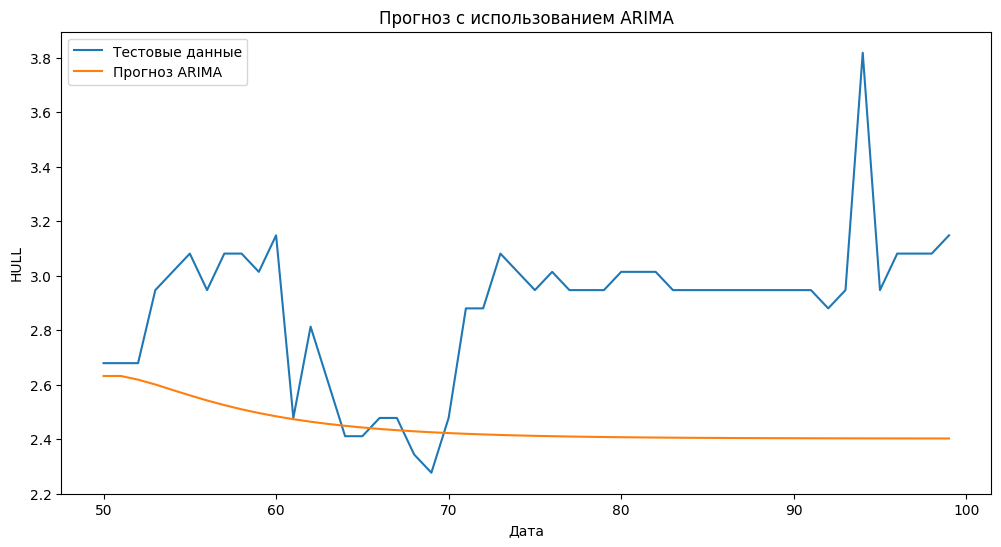

In [6]:
df = pd.read_csv('C:/Users/vadim/Downloads/ETTm1.csv')
x = df.HULL  

M = 50
N = 50  

x_train = x[:M]  
x_test = x[M:M+N] 

model_arima = ARIMA(x_train, order=(3, 0, 0)).fit()
predictions_arima = model_arima.forecast(len(x_test))

mse_arima = mean_squared_error(x_test, predictions_arima)
print(f'Ошибка MSE для модели ARIMA: {mse_arima:.3f}')

plt.figure(figsize=(12, 6))
plt.plot(x_test, label='Тестовые данные')
plt.plot(predictions_arima, label='Прогноз ARIMA')
plt.title('Прогноз с использованием ARIMA')
plt.xlabel('Дата')
plt.ylabel('HULL')
plt.legend()
plt.show()

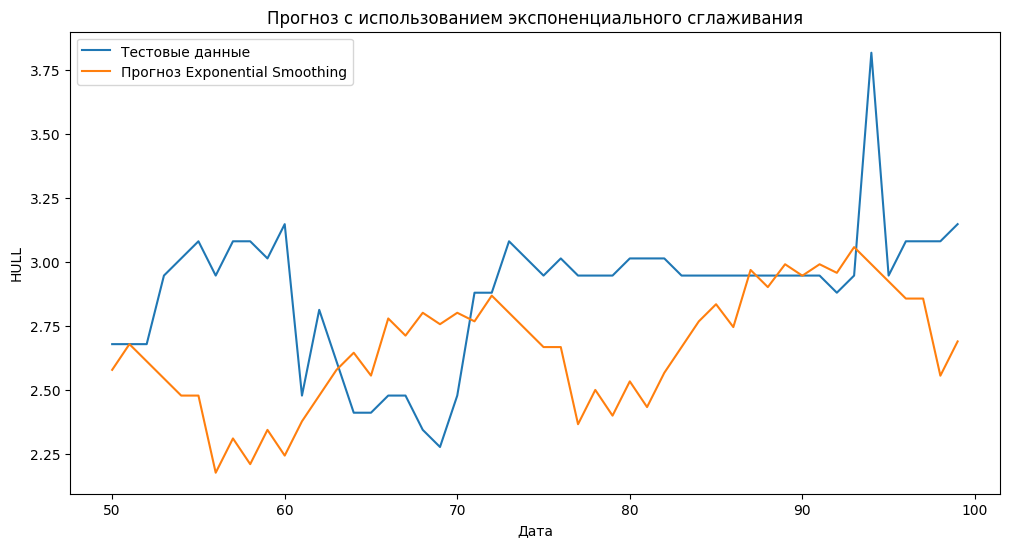

Ошибка MSE для модели Exponential Smoothing: 0.167


In [7]:
# Начальные данные для прогноза
x_train_iter = x[:M]
x_test_iter = x[M:M+N]

# Используем экспоненциальное сглаживание
exp_model = ExponentialSmoothing(x_train_iter, trend='add', seasonal='add', seasonal_periods=21).fit()
exp_predictions = exp_model.forecast(len(x_test_iter))

plt.figure(figsize=(12, 6))
plt.plot(x_test_iter, label='Тестовые данные')
plt.plot(exp_predictions, label='Прогноз Exponential Smoothing')
plt.title('Прогноз с использованием экспоненциального сглаживания')
plt.xlabel('Дата')
plt.ylabel('HULL')
plt.legend()
plt.show()


mse_exp = mean_squared_error(x_test_iter, exp_predictions)
print(f'Ошибка MSE для модели Exponential Smoothing: {mse_exp:.3f}')